In [2]:
import pandas as pd


In [3]:
import numpy as np

In [4]:
import datetime as dt

In [5]:
# Import temperature and population files
df = pd.read_csv('../SynMax/Population Data.csv')

In [6]:
# Import temperature and population files
df2 = pd.read_csv('../Synmax/Temperature Data.csv')

In [7]:
#Create time series including all relevant dates
time = pd.date_range(start = '2015-01-01', end = '2021-04-20', freq='D' )
s = pd.Series(index=time)

print(s)

2015-01-01   NaN
2015-01-02   NaN
2015-01-03   NaN
2015-01-04   NaN
2015-01-05   NaN
              ..
2021-04-16   NaN
2021-04-17   NaN
2021-04-18   NaN
2021-04-19   NaN
2021-04-20   NaN
Freq: D, Length: 2302, dtype: float64
<ipython-input-7-55a513de126b>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(index=time)


In [8]:
# Import temperature and population files
# Sanitize temp data
    # Convert location_date to datetime
    # Set datettime as index
        # Iterate through stations one by one to find station's missing days
            # Find missing days
            # Iterate through missing dates
                # Add date row
                # Add other relevant info - station_code, region, etc
                # Add boolean column indicating interpolated row
                # Interpolate temperatures linearly from previous and next day from same station
                # Weigh city temp entries by population versus entire region




In [9]:
# Subset grouped by date and name
df2bydate = df2.groupby(['location_date', 'name'])[['temp_mean_c', 'temp_min_c', 'temp_max_c']].agg(np.mean)
print(df2bydate)

                                temp_mean_c  temp_min_c  temp_max_c
location_date name                                                 
1/1/2015      Albany              -3.362500        -7.2         0.0
              Atlanta              6.758333         0.0        13.9
              Baltimore           -0.345833        -7.8         6.1
              Boise              -11.070833       -13.9        -8.0
              Boston              -2.329167        -5.6         0.6
...                                     ...         ...         ...
9/9/2020      Spokane             17.358333         8.9        26.1
              St Louis/Lambert    23.937500        19.4        29.4
              Wash DC/Dulles      23.179167        20.0        26.1
              Washington          24.229167        22.8        26.1
              Windsor Locks       22.425000        18.3        27.8

[86932 rows x 3 columns]


In [10]:
# Frame rearranged by date 
datetime = pd.to_datetime(df2['location_date'])
df2['date'] = datetime.dt.date
df2 = df2.set_index("date")

print(df2)

                        name station_code location_date  temp_mean_c  \
date                                                                   
2021-04-20           Atlanta         KATL     4/20/2021    17.491667   
2021-04-20     Windsor Locks         KBDL     4/20/2021    13.887500   
2021-04-20         Nashville         KBNA     4/20/2021    15.175000   
2021-04-20             Boise         KBOI     4/20/2021     9.329167   
2021-04-20            Boston         KBOS     4/20/2021    16.716667   
...                      ...          ...           ...          ...   
2015-01-01  Sacramento/Execu         KSAC      1/1/2015     3.500000   
2015-01-01          Portland         KPWM      1/1/2015    -3.454167   
2015-01-01    Raleigh/Durham         KRDU      1/1/2015     3.291667   
2015-01-01        Pittsburgh         KPIT      1/1/2015    -2.570833   
2015-01-01  Phoenix/Sky HRBR         KPHX      1/1/2015     4.354167   

            temp_min_c  temp_max_c  state  region  
date       

In [11]:
# Check for number of city names in temp data
cnt2 = 0
cities2 = []
for i in range(0, len(df2)):
    if df2['name'][i] not in cities2:
        cities2.append(df2['name'][i])
        cnt2 += 1

print("No of cities:", cnt2)
print("Cities:", cities2)

No of cities: 38
Cities: ['Atlanta', 'Windsor Locks', 'Nashville', 'Boise', 'Boston', 'Buffalo', 'Burbank', 'Baltimore', 'Columbus', 'Los Angeles', 'Covington', 'Washington', 'Denver', 'Dallas', 'Detroit/Wayne', 'Fresno', 'Spokane', 'Wash DC/Dulles', 'Houston', 'Las Vegas', 'NYC/LaGuardia', 'Little Rock', 'Memphis', 'Minneapolis', 'New Orleans', "Chicago O'Hare", 'Portland', 'Philadelphia', 'Phoenix/Sky HRBR', 'Pittsburgh', 'Raleigh/Durham', 'Richmond', 'Sacramento/Execu', 'Seattle', 'San Francisco', 'Salt Lake City', 'St Louis/Lambert', 'Albany']


In [12]:
# Check for unique cities in pop data
cnt1 = 0
cities1 = []
for i in range(0, len(df)):
    if df['City'][i] not in cities1:
        cities1.append(df['City'][i])
        cnt1 += 1

print("No of unique cities:", cnt1)
print("Cities:", cities1)

No of unique cities: 274
Cities: ['Henderson', 'Manchester', 'Elizabeth', 'Newark', 'Paterson', 'Jersey City', 'Albuquerque', 'Buffalo', 'Rochester', 'Syracuse', 'New York', 'Yonkers', 'Charlotte', 'Winston–Salem', 'High Point', 'Greensboro', 'Fayetteville', 'Durham', 'Cary', 'Raleigh', 'Wilmington', 'Fargo', 'Cincinnati', 'Dayton', 'Toledo', 'Columbus', 'Cleveland', 'Akron', 'Oklahoma City', 'Norman', 'Tulsa', 'Broken Arrow', 'Eugene', 'Salem', 'Portland', 'Gresham', 'Erie', 'Pittsburgh', 'Allentown', 'Philadelphia', 'Providence', 'Columbia', 'Charleston', 'Sioux Falls', 'Memphis', 'Clarksville', 'Nashville', 'Murfreesboro', 'Chattanooga', 'Knoxville', 'El Paso', 'Odessa', 'Midland', 'Lubbock', 'Amarillo', 'Abilene', 'Laredo', 'Wichita Falls', 'Killeen', 'Round Rock', 'Brownsville', 'Fort Worth', 'Waco', 'Corpus Christi', 'Denton', 'Arlington', 'Grand Prairie', 'Irving', 'Carrollton', 'Frisco', 'Dallas', 'Plano', 'Richardson', 'McKinney', 'Garland', 'Mesquite', 'Houston', 'Pasadena', 

In [13]:
# Divide the country into regions
Pacific = ['Washington', 'Oregon', 'California', 'Hawaii', 'Alaska']
Mountain = ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'Utah', 'Nevada', 'Arizona', 'New Mexico']
WestNorthCentral = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
WestSouthCentral = ['Texas', 'Oklahoma', 'Arkansas', 'Louisiana']
EastNorthCentral = ['Michigan', 'Wisconsin', 'Illinois', 'Indiana', 'Ohio']
EastSouthCentral = ['Kentucky', 'Tennessee', 'Mississippi', 'Alabama']
SouthAtlantic = ['Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'West Virginia', 'Maryland', 'Delaware', 'District of Columbia']
MidAtlantic = ['Pennsylvania', 'New York', 'New Jersey']
NorthAtlantic = ['Maine', 'Vermont', 'New Hampshire', 'Massachusetts', 'Connecticut', 'Rhode Island']

statecount = len(Pacific) + len(Mountain) + len(WestNorthCentral) + len(WestSouthCentral) + len(EastNorthCentral) + len(EastSouthCentral) + len(SouthAtlantic) + len(MidAtlantic) + len(NorthAtlantic)

print(statecount)

51


In [14]:
regions = [Pacific, Mountain, WestNorthCentral, WestSouthCentral, EastNorthCentral, EastSouthCentral, SouthAtlantic, MidAtlantic, NorthAtlantic]
print(regions)


[['Washington', 'Oregon', 'California', 'Hawaii', 'Alaska'], ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'Utah', 'Nevada', 'Arizona', 'New Mexico'], ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'], ['Texas', 'Oklahoma', 'Arkansas', 'Louisiana'], ['Michigan', 'Wisconsin', 'Illinois', 'Indiana', 'Ohio'], ['Kentucky', 'Tennessee', 'Mississippi', 'Alabama'], ['Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'West Virginia', 'Maryland', 'Delaware', 'District of Columbia'], ['Pennsylvania', 'New York', 'New Jersey'], ['Maine', 'Vermont', 'New Hampshire', 'Massachusetts', 'Connecticut', 'Rhode Island']]


In [15]:
# Check for duplicate city names with different station code - 39 stations 38 cities # KPDX Portland Oregon and KPWM Portland Maine
cnt3 = 0
stations = []
for i in range(0, len(df2)):
    if df2['station_code'][i] not in stations:
        stations.append(df2['station_code'][i])
        cnt3 += 1

print("No of unique stations:", cnt3)
print("Stations:", stations)



No of unique stations: 39
Stations: ['KATL', 'KBDL', 'KBNA', 'KBOI', 'KBOS', 'KBUF', 'KBUR', 'KBWI', 'KCMH', 'KCQT', 'KCVG', 'KDCA', 'KDEN', 'KDFW', 'KDTW', 'KFAT', 'KGEG', 'KIAD', 'KIAH', 'KLAS', 'KLGA', 'KLIT', 'KMEM', 'KMSP', 'KMSY', 'KORD', 'KPDX', 'KPHL', 'KPHX', 'KPIT', 'KPWM', 'KRDU', 'KRIC', 'KSAC', 'KSEA', 'KSFO', 'KSLC', 'KSTL', 'KALB']


In [16]:
# Assign states to stations
df2.loc[df2['station_code']== 'KBDL', ['state']] = 'Connecticut'
df2.loc[df2['station_code']== 'KATL', ['state']] = 'Georgia'
df2.loc[df2['station_code']== 'KBNA', ['state']] = 'Tennessee'
df2.loc[df2['station_code']== 'KBOI', ['state']] = 'Idaho'
df2.loc[df2['station_code']== 'KBOS', ['state']] = 'Massachusetts'
df2.loc[df2['station_code']== 'KBUF', ['state']] = 'New York'
df2.loc[df2['station_code']== 'KBUR', ['state']] = 'California'
df2.loc[df2['station_code']== 'KBWI', ['state']] = 'Maryland'
df2.loc[df2['station_code']== 'KCMH', ['state']] = 'Ohio'
df2.loc[df2['station_code']== 'KCQT', ['state']] = 'California'
df2.loc[df2['station_code']== 'KCVG', ['state']] = 'Kentucky'
df2.loc[df2['station_code']== 'KDCA', ['state']] = 'Virginia'
df2.loc[df2['station_code']== 'KDEN', ['state']] = 'Colorado'
df2.loc[df2['station_code']== 'KDFW', ['state']] = 'Texas'
df2.loc[df2['station_code']== 'KDTW', ['state']] = 'Michigan'
df2.loc[df2['station_code']== 'KFAT', ['state']] = 'California'
df2.loc[df2['station_code']== 'KGEG', ['state']] = 'Washington'
df2.loc[df2['station_code']== 'KIAD', ['state']] = 'Virginia'
df2.loc[df2['station_code']== 'KIAH', ['state']] = 'Texas'
df2.loc[df2['station_code']== 'KLAS', ['state']] = 'Nevada'
df2.loc[df2['station_code']== 'KLGA', ['state']] = 'New York'
df2.loc[df2['station_code']== 'KLIT', ['state']] = 'Arkansas'
df2.loc[df2['station_code']== 'KMEM', ['state']] = 'Tennessee'
df2.loc[df2['station_code']== 'KMSP', ['state']] = 'Minnesota'
df2.loc[df2['station_code']== 'KMSY', ['state']] = 'Louisiana'
df2.loc[df2['station_code']== 'KORD', ['state']] = 'Illinois'
df2.loc[df2['station_code']== 'KPDX', ['state']] = 'Oregon'
df2.loc[df2['station_code']== 'KPHL', ['state']] = 'Pennsylvania'
df2.loc[df2['station_code']== 'KPHX', ['state']] = 'Arizona'
df2.loc[df2['station_code']== 'KPIT', ['state']] = 'Pennsylvania'
df2.loc[df2['station_code']== 'KPWM', ['state']] = 'Maine'
df2.loc[df2['station_code']== 'KRDU', ['state']] = 'North Carolina'
df2.loc[df2['station_code']== 'KRIC', ['state']] = 'Virginia'
df2.loc[df2['station_code']== 'KSAC', ['state']] = 'California'
df2.loc[df2['station_code']== 'KSEA', ['state']] = 'Washington'
df2.loc[df2['station_code']== 'KSFO', ['state']] = 'California'
df2.loc[df2['station_code']== 'KSLC', ['state']] = 'Utah'
df2.loc[df2['station_code']== 'KSTL', ['state']] = 'Missouri'
df2.loc[df2['station_code']== 'KALB', ['state']] = 'New York'

In [17]:

# Assign states to regions in temperature dataset

region = []
for i in range(0, len(df2)):
    for j in range(0, len(regions)):
        if df2['state'][i] in regions[j]:
            region.append(j)
# Establish region column in temp table      
df2["region"] = region  


In [18]:
# Assign states to regions in population dataset

region2 = []
for k in range(0, len(df)):
    for l in range(0, len(regions)):
        if df['State'][k] in regions[l]:
            region2.append(l)

# Establish region column in pop table          
df["region"] = region2


In [19]:
# Save dataframes as .csv
df2.to_csv(path_or_buf='../SynMax/Temp Data.csv')
df.to_csv(path_or_buf='../SynMax/Pop Data.csv')

In [20]:

# Convert date to datetime and fill
datetime = pd.to_datetime(df2['location_date'])
df2['date'] = datetime.dt.date
df2 = df2.set_index("date")
print(df2)

                        name station_code location_date  temp_mean_c  \
date                                                                   
2021-04-20           Atlanta         KATL     4/20/2021    17.491667   
2021-04-20     Windsor Locks         KBDL     4/20/2021    13.887500   
2021-04-20         Nashville         KBNA     4/20/2021    15.175000   
2021-04-20             Boise         KBOI     4/20/2021     9.329167   
2021-04-20            Boston         KBOS     4/20/2021    16.716667   
...                      ...          ...           ...          ...   
2015-01-01  Sacramento/Execu         KSAC      1/1/2015     3.500000   
2015-01-01          Portland         KPWM      1/1/2015    -3.454167   
2015-01-01    Raleigh/Durham         KRDU      1/1/2015     3.291667   
2015-01-01        Pittsburgh         KPIT      1/1/2015    -2.570833   
2015-01-01  Phoenix/Sky HRBR         KPHX      1/1/2015     4.354167   

            temp_min_c  temp_max_c           state  region  
da

In [21]:
# Create sub-frame of each specific station
KATL = df2.loc[df2['station_code'] == stations[0]]
KBDL = df2.loc[df2['station_code'] == stations[1]]
KBNA = df2.loc[df2['station_code'] == stations[2]]
KBOI = df2.loc[df2['station_code'] == stations[3]]
KBOS = df2.loc[df2['station_code'] == stations[4]]
KBUF = df2.loc[df2['station_code'] == stations[5]]
KBUR = df2.loc[df2['station_code'] == stations[6]]
KBWI = df2.loc[df2['station_code'] == stations[7]]
KCMH = df2.loc[df2['station_code'] == stations[8]]
KCQT = df2.loc[df2['station_code'] == stations[9]]
KCVG = df2.loc[df2['station_code'] == stations[10]]
KDCA = df2.loc[df2['station_code'] == stations[11]]
KDEN = df2.loc[df2['station_code'] == stations[12]]
KDFW = df2.loc[df2['station_code'] == stations[13]]
KDTW = df2.loc[df2['station_code'] == stations[14]]
KFAT = df2.loc[df2['station_code'] == stations[15]]
KGEG = df2.loc[df2['station_code'] == stations[16]]
KIAD = df2.loc[df2['station_code'] == stations[17]]
KIAH = df2.loc[df2['station_code'] == stations[18]]
KLAS = df2.loc[df2['station_code'] == stations[19]]
KLGA = df2.loc[df2['station_code'] == stations[20]]
KLIT = df2.loc[df2['station_code'] == stations[21]]
KMEM = df2.loc[df2['station_code'] == stations[22]]
KMSP = df2.loc[df2['station_code'] == stations[23]]
KMSY = df2.loc[df2['station_code'] == stations[24]]
KORD = df2.loc[df2['station_code'] == stations[25]]
KPDX = df2.loc[df2['station_code'] == stations[26]]
KPHL = df2.loc[df2['station_code'] == stations[27]]
KPHX = df2.loc[df2['station_code'] == stations[28]]
KPIT = df2.loc[df2['station_code'] == stations[29]]
KPWM = df2.loc[df2['station_code'] == stations[30]]
KRDU = df2.loc[df2['station_code'] == stations[31]]
KRIC = df2.loc[df2['station_code'] == stations[32]]
KSAC = df2.loc[df2['station_code'] == stations[33]]
KSEA = df2.loc[df2['station_code'] == stations[34]]
KSFO = df2.loc[df2['station_code'] == stations[35]]
KSLC = df2.loc[df2['station_code'] == stations[36]]
KSTL = df2.loc[df2['station_code'] == stations[37]]
KALB = df2.loc[df2['station_code'] == stations[38]]
print(KALB)

              name station_code location_date  temp_mean_c  temp_min_c  \
date                                                                     
2021-04-19  Albany         KALB     4/19/2021     9.025000         2.8   
2021-04-18  Albany         KALB     4/18/2021     8.104167         2.2   
2021-04-17  Albany         KALB     4/17/2021     5.370833         2.2   
2021-04-16  Albany         KALB     4/16/2021     2.425000        -0.6   
2021-04-15  Albany         KALB     4/15/2021     9.204167         2.2   
...            ...          ...           ...          ...         ...   
2015-01-05  Albany         KALB      1/5/2015    -4.654167       -10.6   
2015-01-04  Albany         KALB      1/4/2015     4.166667         0.6   
2015-01-03  Albany         KALB      1/3/2015    -3.545833        -6.7   
2015-01-02  Albany         KALB      1/2/2015    -0.683333        -3.3   
2015-01-01  Albany         KALB      1/1/2015    -3.362500        -7.2   

            temp_max_c     state  reg

In [22]:
# Add column indicating if data was missing
KATL['missing'] = '0'
print(KATL)

               name station_code location_date  temp_mean_c  temp_min_c  \
date                                                                      
2021-04-20  Atlanta         KATL     4/20/2021    17.491667        12.2   
2021-04-19  Atlanta         KATL     4/19/2021    16.154167        11.1   
2021-04-18  Atlanta         KATL     4/18/2021    16.720833        11.7   
2021-04-17  Atlanta         KATL     4/17/2021    16.795833        12.8   
2021-04-16  Atlanta         KATL     4/16/2021    14.695833        10.0   
...             ...          ...           ...          ...         ...   
2015-01-05  Atlanta         KATL      1/5/2015     5.045833         1.1   
2015-01-04  Atlanta         KATL      1/4/2015    14.279167         6.7   
2015-01-03  Atlanta         KATL      1/3/2015    11.154167         8.9   
2015-01-02  Atlanta         KATL      1/2/2015     8.116667         6.7   
2015-01-01  Atlanta         KATL      1/1/2015     6.758333         0.0   

            temp_max_c  

In [23]:
# Add missing dates to station sub-frame
time = pd.date_range(start = '2015-01-01', end = '2021-04-20', freq='D' )
sTime = pd.Series(index=time)
KATL = pd.concat([KATL, sTime[~sTime.index.isin(KATL.index)]]).sort_index()
KATL = KATL.drop([0],axis=1)

print(KATL)

           location_date missing     name  region    state station_code  \
2015-01-01      1/1/2015       0  Atlanta     6.0  Georgia         KATL   
2015-01-02      1/2/2015       0  Atlanta     6.0  Georgia         KATL   
2015-01-03      1/3/2015       0  Atlanta     6.0  Georgia         KATL   
2015-01-04      1/4/2015       0  Atlanta     6.0  Georgia         KATL   
2015-01-05      1/5/2015       0  Atlanta     6.0  Georgia         KATL   
...                  ...     ...      ...     ...      ...          ...   
2021-04-16     4/16/2021       0  Atlanta     6.0  Georgia         KATL   
2021-04-17     4/17/2021       0  Atlanta     6.0  Georgia         KATL   
2021-04-18     4/18/2021       0  Atlanta     6.0  Georgia         KATL   
2021-04-19     4/19/2021       0  Atlanta     6.0  Georgia         KATL   
2021-04-20     4/20/2021       0  Atlanta     6.0  Georgia         KATL   

            temp_max_c  temp_mean_c  temp_min_c  
2015-01-01        13.9     6.758333         0.0  

In [24]:
# Flag missing dates as missing

# Find rows where data is missing
missingKATL = KATL.loc[KATL['missing'].isna() ]

# Set values in missing subset 
# Set missing to 1
missingKATL.loc[:,'missing'] = '1'

# Set name to station name
missingKATL.loc[:, 'name'] = 'Atlanta'

# Set region to station region
missingKATL.loc[:, 'region'] = '6'

# Set state to station state
missingKATL.loc[:, 'state'] = 'Georgia'

# Set station_code to station
missingKATL.loc[:, 'station_code'] = 'KATL'

# Remove empty columns of temp data
missingKATL.drop(columns=['temp_min_c', 'temp_mean_c', 'temp_max_c', 'location_date'], inplace=True, axis=0)

print(missingKATL)


                    missing     name region    state station_code
2015-03-08 00:00:00       1  Atlanta      6  Georgia         KATL
2015-11-01 00:00:00       1  Atlanta      6  Georgia         KATL
2016-03-13 00:00:00       1  Atlanta      6  Georgia         KATL
2016-11-06 00:00:00       1  Atlanta      6  Georgia         KATL
2017-03-12 00:00:00       1  Atlanta      6  Georgia         KATL
2017-09-16 00:00:00       1  Atlanta      6  Georgia         KATL
2017-11-05 00:00:00       1  Atlanta      6  Georgia         KATL
2018-03-11 00:00:00       1  Atlanta      6  Georgia         KATL
2018-11-04 00:00:00       1  Atlanta      6  Georgia         KATL
2018-12-12 00:00:00       1  Atlanta      6  Georgia         KATL
2019-03-10 00:00:00       1  Atlanta      6  Georgia         KATL
2019-11-03 00:00:00       1  Atlanta      6  Georgia         KATL
2020-03-08 00:00:00       1  Atlanta      6  Georgia         KATL
2020-11-01 00:00:00       1  Atlanta      6  Georgia         KATL
2021-03-14

In [25]:
#Interpolate temp_min_c within KATL set 
KATLinterpolMIN = KATL['temp_min_c'].interpolate()
print(KATLinterpolMIN)

2015-01-01     0.0
2015-01-02     6.7
2015-01-03     8.9
2015-01-04     6.7
2015-01-05     1.1
              ... 
2021-04-16    10.0
2021-04-17    12.8
2021-04-18    11.7
2021-04-19    11.1
2021-04-20    12.2
Name: temp_min_c, Length: 2302, dtype: float64


In [26]:
#Interpolate temp_max_c within KATL set 
KATLinterpolMAX = KATL['temp_max_c'].interpolate()
print(KATLinterpolMAX)

2015-01-01    13.9
2015-01-02     9.4
2015-01-03    16.1
2015-01-04    17.8
2015-01-05     8.9
              ... 
2021-04-16    19.4
2021-04-17    21.7
2021-04-18    22.2
2021-04-19    21.7
2021-04-20    23.3
Name: temp_max_c, Length: 2302, dtype: float64


In [27]:
#Interpolate temp_mean_c within KATL set 
KATLinterpolMEAN = KATL['temp_mean_c'].interpolate()
print(KATLinterpolMEAN)

2015-01-01     6.758333
2015-01-02     8.116667
2015-01-03    11.154167
2015-01-04    14.279167
2015-01-05     5.045833
                ...    
2021-04-16    14.695833
2021-04-17    16.795833
2021-04-18    16.720833
2021-04-19    16.154167
2021-04-20    17.491667
Name: temp_mean_c, Length: 2302, dtype: float64


In [28]:
# Concatenate sub-frames of interpolated temperature data into single frame
KATLinterpol = pd.concat([KATLinterpolMAX, KATLinterpolMIN, KATLinterpolMEAN], axis=1)

print(KATLinterpol)

            temp_max_c  temp_min_c  temp_mean_c
2015-01-01        13.9         0.0     6.758333
2015-01-02         9.4         6.7     8.116667
2015-01-03        16.1         8.9    11.154167
2015-01-04        17.8         6.7    14.279167
2015-01-05         8.9         1.1     5.045833
...                ...         ...          ...
2021-04-16        19.4        10.0    14.695833
2021-04-17        21.7        12.8    16.795833
2021-04-18        22.2        11.7    16.720833
2021-04-19        21.7        11.1    16.154167
2021-04-20        23.3        12.2    17.491667

[2302 rows x 3 columns]


In [29]:
# Create new empty frame and integrate missing date row frames with interpolated temp frame
KATL2 = []
KATL2 = pd.DataFrame(s)
KATL2 = pd.concat([KATLinterpol, missingKATL], axis=1)
KATL2 = KATL2.dropna()
print(KATL2)

                     temp_max_c  temp_min_c  temp_mean_c missing     name  \
2015-03-08 00:00:00       18.05        5.55    11.766667       1  Atlanta   
2015-11-01 00:00:00       20.00       14.15    16.570833       1  Atlanta   
2016-03-13 00:00:00       23.85       15.55    20.081250       1  Atlanta   
2016-11-06 00:00:00       21.95       11.15    16.058333       1  Atlanta   
2017-03-12 00:00:00       10.00        3.05     6.320833       1  Atlanta   
2017-09-16 00:00:00       29.20       19.45    24.535417       1  Atlanta   
2017-11-05 00:00:00       25.85       16.70    20.764583       1  Atlanta   
2018-03-11 00:00:00       15.30        4.45    10.218750       1  Atlanta   
2018-11-04 00:00:00       17.80        9.15    13.460417       1  Atlanta   
2018-12-12 00:00:00       11.40        2.25     6.491667       1  Atlanta   
2019-03-10 00:00:00       21.65       10.30    15.127083       1  Atlanta   
2019-11-03 00:00:00       15.55        4.20     9.664583       1  Atlanta   

In [30]:
# Drop all NaN rows from original station subframe and combine cleaned and interpolated subframes
KATL = KATL.dropna()
KATL3 = pd.concat([KATL, KATL2], axis=0)
# Review complete sub-frame of KATL 
print(KATL3)

                    location_date missing     name region    state  \
2015-01-01               1/1/2015       0  Atlanta    6.0  Georgia   
2015-01-02               1/2/2015       0  Atlanta    6.0  Georgia   
2015-01-03               1/3/2015       0  Atlanta    6.0  Georgia   
2015-01-04               1/4/2015       0  Atlanta    6.0  Georgia   
2015-01-05               1/5/2015       0  Atlanta    6.0  Georgia   
...                           ...     ...      ...    ...      ...   
2019-03-10 00:00:00           NaN       1  Atlanta      6  Georgia   
2019-11-03 00:00:00           NaN       1  Atlanta      6  Georgia   
2020-03-08 00:00:00           NaN       1  Atlanta      6  Georgia   
2020-11-01 00:00:00           NaN       1  Atlanta      6  Georgia   
2021-03-14 00:00:00           NaN       1  Atlanta      6  Georgia   

                    station_code  temp_max_c  temp_mean_c  temp_min_c  
2015-01-01                  KATL       13.90     6.758333        0.00  
2015-01-02     

In [31]:
# Add column indicating if data was missing
KSTL['missing'] = False

# Add missing dates to station sub-frame
time = pd.date_range(start = '2015-01-01', end = '2021-04-20', freq='D' )
sTime = pd.Series(index=time)
KSTL = pd.concat([KSTL, sTime[~sTime.index.isin(KSTL.index)]]).sort_index()
KSTL = KSTL.drop([0],axis=1)

# Find rows where data is missing
missingKSTL = KSTL.loc[KSTL['missing'].isna() ]
# Set values in missing subset 
# Set missing to 1
missingKSTL.loc[:,'missing'] = True

# Set name to station name
missingKSTL.loc[:, 'name'] = 'St Louis/Lambert'

# Set region to station region
missingKSTL.loc[:, 'region'] = '2'

# Set state to station state
missingKSTL.loc[:, 'state'] = 'Missouri'

# Set station_code to station
missingKSTL.loc[:, 'station_code'] = 'KSTL'

# Remove empty columns of temp data
missingKSTL.drop(columns=['temp_min_c', 'temp_mean_c', 'temp_max_c', 'location_date'], inplace=True, axis=0)

#Interpolate temp_min_c within KSTL set 
KSTLinterpolMIN = KSTL['temp_min_c'].interpolate()

#Interpolate temp_max_c within KSTL set 
KSTLinterpolMAX = KSTL['temp_max_c'].interpolate()

#Interpolate temp_mean_c within KSTL set 
KSTLinterpolMEAN = KSTL['temp_mean_c'].interpolate()

# Concatenate sub-frames of interpolated temperature data into single frame
KSTLinterpol = pd.concat([KSTLinterpolMAX, KSTLinterpolMIN, KSTLinterpolMEAN], axis=1)

# Create new empty frame and integrate missing date row frames with interpolated temp frame
KSTL2 = []
KSTL2 = pd.DataFrame(s)
KSTL2 = pd.concat([KSTLinterpol, missingKSTL], axis=1)
KSTL2 = KSTL2.dropna()

# Drop all NaN rows from original station subframe and combine cleaned and interpolated subframes
KSTL = KSTL.dropna()
KSTL3 = pd.concat([KSTL, KSTL2], axis=0)
# Review complete sub-frame of KSTL 
print(KSTL3)

<ipython-input-31-c3432c598a67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KSTL['missing'] = False
<ipython-input-31-c3432c598a67>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sTime = pd.Series(index=time)
                    location_date missing              name region     state  \
2015-01-01               1/1/2015   False  St Louis/Lambert    2.0  Missouri   
2015-01-02               1/2/2015   False  St Louis/Lambert    2.0  Missouri   
2015-01-03               1/3/2015   False  St Louis/Lambert    2.0  Missouri   
2015-01-04               1/4/2015   False  St Louis/Lambert    2.0  Missouri   
2015-01-05        

In [32]:
# Append all wrangled station dataframes into one
df3 = pd.DataFrame(KATL3)

df3 = pd.concat([df3, KBDL3, KBNA3, KBOI3, KBOS3, KBUF3, KBUR3, KBWI3, KCMH3, KCQT3], axis=0)
df3 = pd.concat([df3, KDCA3, KDEN3, KDFW3, KDTW3, KFAT3, KGEG3, KIAD3, KIAH3, KLAS3], axis=0)
df3 = pd.concat([df3, KLIT3, KMEM3, KMSP3, KMSY3, KORD3, KPDX3, KPHL3, KPHX3, KPIT3], axis=0)
df3 = pd.concat([df3, KRDU3, KRIC3, KSAC3, KSEA3, KSFO3, KSLC3, KSTL3, KALB3, KCVG3], axis=0)
df3 = pd.concat([df3, KPWM3, KLGA3], axis=0)

NameError: name 'KBDL3' is not defined

In [ ]:
df3.to_csv(path_or_buf='../SynMax/Temp Data.csv')

In [ ]:
print(df)

In [ ]:
dfWeights = pd.DataFrame(s)
print(dfWeights)

In [ ]:
# Create a population weighted daily temperature timeseries - Population data is old and inaccurate 
    # Add population column to stations - 
    # Albany (97,879 in 2011), Covington (use Cincinnati population), Portland Maine (66240 in 2011), Windsor Locks (12498 in 2010 census) missing from pop data
    # Las Vegas AND North Las Vegas present in pop data (Las Vegas metro area population MUCH larger than either one listed in given table)
    # Raleigh and Durham present in pop data
    # St Louis vs St. Louis
    # Nearby stations - Divide population by two to give equal weight to both stations in the area
        # Washington vs Wash DC/Dulles, KDCA (Arlington Virginia) and KIAD (Dulles, VA)
        # Burbank vs Los Angeles
        # Las Vegas vs North Las Vegas
        
    # Create regional weight column 
    # Create national weight column 
    # Weight of station within region vs other stations - Average regional min, max, mean of any particular day
    # Weight of station within country vs other stations - Average national min, max, mean of any particular day
    # Create seasonal average column
    # Create seasonal high column
    # Create seasonal low column
    # Create monthly high column
    # Create monthly low column
    # Create monthly mean column

In [ ]:
# 1 Someone who wants to know how the temperature compares to the seasonal average as well as high and low cases. 

# 2 Someone who wants to view the monthly average, min and max. 

# 3 Someone who wants to graphically see what data is missing or projected. 

In [ ]:
# Here are 4 ways to select all rows with NaN values in Pandas DataFrame:

# (1) Using isna() to select all rows with NaN under a single DataFrame column:
# df[df['column name'].isna()]

# (2) Using isnull() to select all rows with NaN under a single DataFrame column:
# df[df['column name'].isnull()]

# (3) Using isna() to select all rows with NaN under an entire DataFrame:
# df[df.isna().any(axis=1)]

# (4) Using isnull() to select all rows with NaN under an entire DataFrame:
# df[df.isnull().any(axis=1)]

In [ ]:
df3.describe

In [ ]:
# Create subframe with population data and weights for calculations

type(stations)

dfStations = pd.DataFrame(stations)


In [ ]:

dfStations['population'] = 0
dfStations['nationalweight'] = 0
dfStations['regionalweight'] = 0

print(dfStations)

In [ ]:
# Add 2015 metropolitan area populations - split populations by two where metropolitan area has two weather stations - www.census.gov & macrotrends.net
dfStations.at[0, 'population'] = 5162000
dfStations.at[1, 'population'] = 1211324
dfStations.at[2, 'population'] = 1775583
dfStations.at[3, 'population'] = 399000
dfStations.at[4, 'population'] = 4261000
dfStations.at[5, 'population'] = 259517
dfStations.at[6, 'population'] = 12345000/2
dfStations.at[7, 'population'] = 2790053
dfStations.at[8, 'population'] = 1510000
dfStations.at[9, 'population'] = 12345000/2
dfStations.at[10, 'population'] = 1693000
dfStations.at[11, 'population'] = 6100000/2
dfStations.at[12, 'population'] = 2608000
dfStations.at[13, 'population'] = 5723000
dfStations.at[14, 'population'] = 3648000
dfStations.at[15, 'population'] = 714000
dfStations.at[16, 'population'] = 419000
dfStations.at[17, 'population'] = 6100000/2
dfStations.at[18, 'population'] = 5660000
dfStations.at[19, 'population'] = 2280000
dfStations.at[20, 'population'] = 18648000
dfStations.at[21, 'population'] = 474000
dfStations.at[22, 'population'] = 1109000
dfStations.at[23, 'population'] = 2800000
dfStations.at[24, 'population'] = 950000
dfStations.at[25, 'population'] = 8770000
dfStations.at[26, 'population'] = 2008000
dfStations.at[27, 'population'] = 5602000
dfStations.at[28, 'population'] = 4077000
dfStations.at[29, 'population'] = 1724000
dfStations.at[30, 'population'] = 66490
dfStations.at[31, 'population'] = 1145000
dfStations.at[32, 'population'] = 1033000
dfStations.at[33, 'population'] = 1927000
dfStations.at[34, 'population'] = 3259000
dfStations.at[35, 'population'] = 3309000
dfStations.at[36, 'population'] = 1099000
dfStations.at[37, 'population'] = 2190000
dfStations.at[38, 'population'] = 615000
print(dfStations)

In [ ]:
totalPop = dfStations['population'].sum()

print(totalPop)

In [ ]:
dfStations.assign(nationalweight = dfStations['population']/totalPop)

In [ ]:
dfStations.columns = ['station_code', 'population', 'nationalweight', 'regionalweight']
dfStations.assign(nationalweight = dfStations['population']/totalPop)
print(dfStations)

In [ ]:
totalWeight = dfStations['nationalweight'].sum()
print(totalWeight)

In [ ]:
from numpy import average

In [ ]:
# Calculated weighted average national MAX temperature by day



weighted_avg_m3 = round(average( df3['temp_max_c'], axis=0, weights = dfStations['population']),2)

weighted_avg_m3  

In [ ]:
df3.to_csv(path_or_buf='../SynMax/Temp Data.csv')

In [ ]:
# Group df3 by station_code
df3.groupby(['location_date', 'station_code'])[['temp_mean_c', 'temp_min_c', 'temp_max_c']].agg(np.mean)

<AxesSubplot:xlabel='Year', ylabel='Temp Degrees C'>

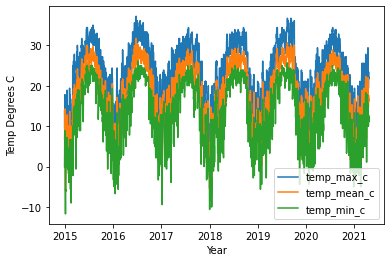

In [39]:
import matplotlib.pyplot as plt
# Plot complete timeseries with interpolation
df3.plot(ylabel='Temp Degrees C', xlabel='Year', subplots=False)

array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>], dtype=object)

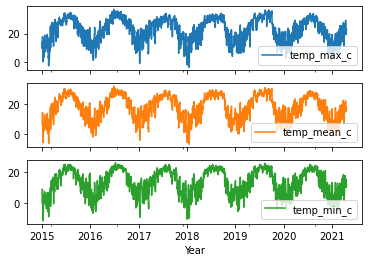

In [38]:
# Plot timeseries with temp min, max, and mean broken into three separate graphs
df3.plot(xlabel='Year', subplots=True)

In [ ]:
df7 = pd.Series(s)

In [ ]:
print(df7)

In [ ]:
df3.loc[df3.station_code == 'KATL', :].head()

In [ ]:
# Weighted daily temperature vs seasonal average, season high, and season low